#### z5471284 HONGYE ZHOU

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
df = pd.read_excel("AirQualityUCI _ Students.xlsx")
df.drop(["Date", "Time"], inplace=True, axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


#### Check for missing data 

In [4]:
def missvalue_pre(data):
    feature_columns = data.columns.tolist()
    sample_num = data.shape[0]
    missvalue = []
    for col in feature_columns:
        sum_col = (data[col] <  0).sum()
        missvalue.append(sum_col / sample_num)
    miss_value = pd.Series(missvalue, index=feature_columns)
    print(miss_value)

missvalue_pre(df)

CO(GT)           0.189639
PT08.S1(CO)      0.043790
NMHC(GT)         0.900335
C6H6(GT)         0.043790
PT08.S2(NMHC)    0.043790
NOx(GT)          0.188203
PT08.S3(NOx)     0.043790
NO2(GT)          0.188562
PT08.S4(NO2)     0.043790
PT08.S5(O3)      0.043790
T                0.045465
RH               0.043790
AH               0.043790
dtype: float64


###### we can find that, the proportion of missing values varies in different columns

In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000
mean,-36.187928,1038.533411,-158.119167,0.894268,889.323901,162.607933,790.043631,53.912228,1382.696877,968.419987,8.713360,38.201273,-7.780588
std,79.260156,338.349674,141.931963,43.609487,350.473599,260.322621,327.590979,130.150259,479.299713,464.837162,45.516939,53.678637,41.139234
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.500000,915.062500,-200.000000,3.968875,709.000000,45.000000,634.250000,49.000000,1177.500000,692.062500,10.450000,33.974999,0.675253
50%,1.500000,1048.500000,-200.000000,7.826424,892.000000,136.000000,793.000000,95.000000,1442.500000,940.125000,17.225000,48.137500,0.971383
75%,2.600000,1215.687500,-200.000000,13.636091,1104.750000,282.000000,958.687500,132.000000,1658.187500,1251.750000,24.075000,61.593750,1.307486
max,11.900000,2007.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,87.174999,2.231036


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8358 entries, 0 to 8357
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8358 non-null   float64
 1   PT08.S1(CO)    8358 non-null   float64
 2   NMHC(GT)       8358 non-null   int64  
 3   C6H6(GT)       8358 non-null   float64
 4   PT08.S2(NMHC)  8358 non-null   float64
 5   NOx(GT)        8358 non-null   float64
 6   PT08.S3(NOx)   8358 non-null   float64
 7   NO2(GT)        8358 non-null   float64
 8   PT08.S4(NO2)   8358 non-null   float64
 9   PT08.S5(O3)    8358 non-null   float64
 10  T              8358 non-null   float64
 11  RH             8358 non-null   float64
 12  AH             8358 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 849.0 KB


In [7]:
df["NMHC(GT)"].value_counts()

NMHC(GT)
-200    7525
 66       14
 40        9
 93        8
 29        8
        ... 
 721       1
 787       1
 307       1
 200       1
 339       1
Name: count, Length: 406, dtype: int64

#### we can find that the type of nmhc(gt) is int and almost 90% of its value are missing
#### in fact, i think its can be deleted or be replaced by a new value to represent all missing values
#### There are not many missing values for other features, so we use the average value to fill in.

In [8]:
fill_cols = ["PT08.S1(CO)", "C6H6(GT)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]

preCO_fill_vlaues = {}
preNOx_fill_values = {}

def data_process(df):
    for col in fill_cols:
        fill_value = df.loc[df[col] >= 0, col].mean()
        preCO_fill_vlaues[col] = fill_value
        preNOx_fill_values[col] = fill_value
        df.loc[df[col] < 0, col] = fill_value
    df.loc[df["NMHC(GT)"] == -200, "NMHC(GT)"] = 0
    preNOx_fill_values["NMHC(GT)"] = 0
    preCO_fill_vlaues["NMHC(GT)"] = 0
    return df

df = data_process(df)

In [9]:
missvalue_pre(df)

CO(GT)           0.189639
PT08.S1(CO)      0.000000
NMHC(GT)         0.000000
C6H6(GT)         0.000000
PT08.S2(NMHC)    0.000000
NOx(GT)          0.188203
PT08.S3(NOx)     0.000000
NO2(GT)          0.188562
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000000
dtype: float64


#### obviously, NOX has strong correlation with NO2, so we can figure this out later.

##### Create datasets for two tasks
##### delete all samples whose target are missing

In [14]:
df_preCO_train = df[df["CO(GT)"] != -200]
df_preNOx_train = df[df["NOx(GT)"] != - 200]
df_preCO_test = df[df["CO(GT)"] == -200].drop(["CO(GT)"], axis=1)
df_preNOx_test = df[df["NOx(GT)"] == -200].drop(["NOx(GT)"], axis=1)

In [11]:
missvalue_pre(df_preCO_train), missvalue_pre(df_preNOx_train)

CO(GT)           0.000000
PT08.S1(CO)      0.000000
NMHC(GT)         0.000000
C6H6(GT)         0.000000
PT08.S2(NMHC)    0.000000
NOx(GT)          0.056696
PT08.S3(NOx)     0.000000
NO2(GT)          0.057139
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000000
dtype: float64
CO(GT)           0.058364
PT08.S1(CO)      0.000000
NMHC(GT)         0.000000
C6H6(GT)         0.000000
PT08.S2(NMHC)    0.000000
NOx(GT)          0.000000
PT08.S3(NOx)     0.000000
NO2(GT)          0.000442
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000000
dtype: float64


(None, None)

#### Predicting CO content is a classification task

In [15]:
threshold = df_preCO_train["CO(GT)"].mean()
df_preCO_train["target"] = np.where(df_preCO_train["CO(GT)"] > threshold, 1, 0)
df_preCO_train.drop(["CO(GT)"], axis=1, inplace=True)
df_preNOx_train.rename(columns={"NOx(GT)":"target"}, inplace=True)

C:\Users\learn\AppData\Local\Temp\ipykernel_15112\1399961068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preCO_train["target"] = np.where(df_preCO_train["CO(GT)"] > threshold, 1, 0)
C:\Users\learn\AppData\Local\Temp\ipykernel_15112\1399961068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preCO_train.drop(["CO(GT)"], axis=1, inplace=True)
C:\Users\learn\AppData\Local\Temp\ipykernel_15112\1399961068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [16]:
from sklearn.model_selection import train_test_split

y_preCO_target = df_preCO_train["target"]
df_preCO_train.drop(["target"], axis=1, inplace=True)
y_preNOx_target = df_preNOx_train["target"]
df_preNOx_train.drop(["target"], axis=1, inplace=True)

C:\Users\learn\AppData\Local\Temp\ipykernel_15112\102213358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preCO_train.drop(["target"], axis=1, inplace=True)
C:\Users\learn\AppData\Local\Temp\ipykernel_15112\102213358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preNOx_train.drop(["target"], axis=1, inplace=True)


In [17]:
df_preCO_train.shape, y_preCO_target.shape, df_preNOx_train.shape, y_preNOx_target.shape

((6773, 12), (6773,), (6785, 12), (6785,))

#### split the whole dataset into train and validaion to find the optimal parameters.

In [18]:
from sklearn.model_selection import train_test_split

X_preNOx, X_preNOx_valid, y_preNOX, y_preNOx_valid = train_test_split(df_preNOx_train, y_preNOx_target, random_state=42, shuffle=42, test_size=0.2)
X_preCO, X_preCO_valid, y_preCO, y_preCO_valid = train_test_split(df_preCO_train, y_preCO_target, random_state=42, shuffle=42, test_size=0.2)

C:\Users\learn\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [19]:
X_preNOx.shape, X_preNOx_valid.shape, y_preNOX.shape, y_preNOx_valid.shape

((5428, 12), (1357, 12), (5428,), (1357,))

#### continue to fill in the two datasets, to satisfy the generalization ability, the missing value of the validaion should be filled with the data from the train dataset

In [20]:
fill_cols_CO = ["NOx(GT)", "NO2(GT)"]
fill_cols_NOx = ["CO(GT)", "NO2(GT)"]
for col in fill_cols_CO:
    fill_value = X_preCO.loc[X_preCO[col] >= 0, col].median()
    if col not in preCO_fill_vlaues.keys():
        preCO_fill_vlaues[col] = fill_value
    X_preCO.loc[X_preCO[col] < 0, col] = fill_value
    X_preCO_valid.loc[X_preCO_valid[col] < 0, col] = fill_value

for col in fill_cols_NOx:
    fill_value = X_preNOx.loc[X_preNOx[col] >= 0, col].median()
    if col not in preNOx_fill_values.keys():
        preNOx_fill_values[col] = fill_value
    X_preNOx.loc[X_preNOx[col] < 0, col] = fill_value
    X_preNOx_valid.loc[X_preNOx_valid[col] < 0, col] = fill_value

In [21]:
with open("preCO_fill_values.pkl", "wb") as f1:
    pickle.dump(preCO_fill_vlaues, f1)
with open("preNOx_fill_values.pkl", "wb") as f2:
    pickle.dump(preNOx_fill_values, f2)

In [22]:
missvalue_pre(X_preNOx), missvalue_pre(X_preNOx_valid)

CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64


(None, None)

##### Now the dataset has no missing value.

#### finding outliers and replacing them

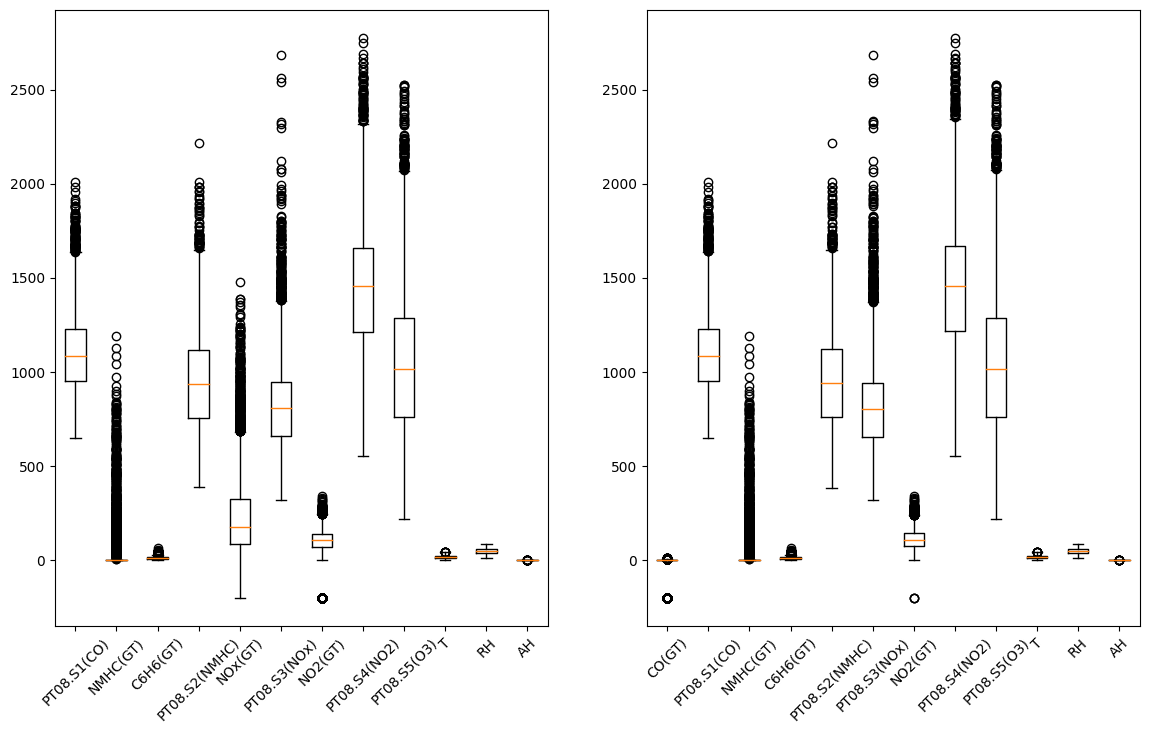

In [23]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.boxplot(df_preCO_train.values, labels=df_preCO_train.columns)
plt.xticks(fontsize=10, rotation=45)
plt.subplot(1, 2, 2)
plt.boxplot(df_preNOx_train.values, labels=df_preNOx_train.columns)
plt.xticks(fontsize=10, rotation=45)
plt.show()

In [24]:
def findoutliners(X, sigma=3):
    outliners = []
    for col in X.columns:
        mean = np.mean(X[col])
        std = np.std(X[col])
        for i, val in enumerate(X[col]):
            if np.abs((val - mean) / std) > sigma:
                outliners.append((col, i, val))
    return outliners

def handle_outliers(df, target_col):
    df = df.reset_index(drop=True)
    outliers = findoutliners(df)
    # print("Outliers before handling:", outliers)
    for col, index, val in outliers:
        if col != target_col:
            mean = np.mean(df[col])
            df.at[index, col] = mean
    # outliers = findoutliners(df)
    # print("Outliers after handling:", outliers)


In [25]:

handle_outliers(X_preCO, "target")

handle_outliers(X_preNOx, "target")


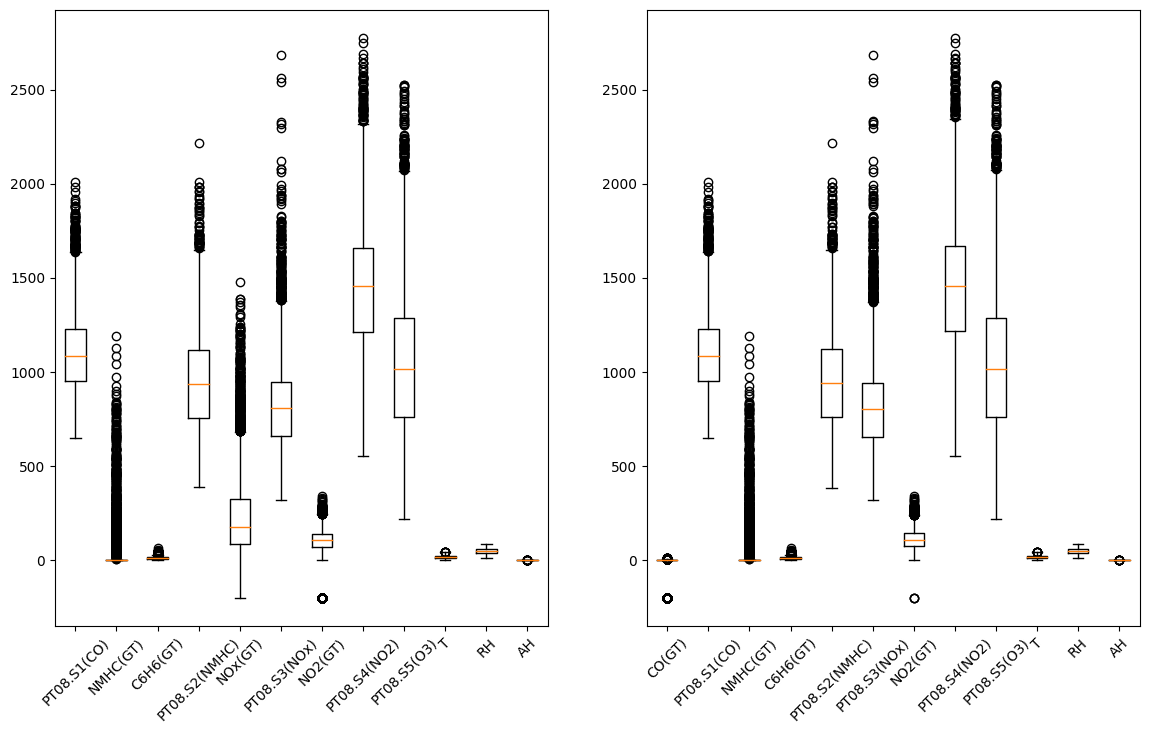

In [26]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.boxplot(df_preCO_train.values, labels=df_preCO_train.columns)
plt.xticks(fontsize=10, rotation=45)
plt.subplot(1, 2, 2)
plt.boxplot(df_preNOx_train.values, labels=df_preNOx_train.columns)
plt.xticks(fontsize=10, rotation=45)
plt.show()

#### Next, it is necessary to perform consistency processing on the training and testing sets

##### Standardized processing

In [27]:
X_totest_preCO, X_totest_preNOx = X_preCO.copy(), X_preNOx.copy()

In [28]:
from sklearn.preprocessing import MinMaxScaler

def minmax(type_model, df, df_test=None):
    feature_columns = df.columns
    minmaxscaler = MinMaxScaler()
    X = minmaxscaler.fit_transform(df)
    with open(f"minmaxscaler_{type_model}.pkl", 'wb') as f:
        pickle.dump(minmaxscaler, f)
    data = pd.DataFrame(X, columns=feature_columns)
    if not df_test.empty:
        df_test = minmaxscaler.transform(df_test)
        data_test = pd.DataFrame(df_test, columns=feature_columns)
    return data, data_test

X_preNOx, X_preNOx_valid = minmax("regression", X_preNOx, X_preNOx_valid)
X_preCO, X_preCO_valid = minmax("classification", X_preCO, X_preCO_valid)

In [29]:
X_preNOx.shape, X_preNOx_valid.shape, y_preNOX.shape, y_preNOx_valid.shape, X_preCO.shape, X_preCO_valid.shape, y_preCO.shape, y_preCO_valid.shape

((5428, 12),
 (1357, 12),
 (5428,),
 (1357,),
 (5418, 12),
 (1355, 12),
 (5418,),
 (1355,))

In [30]:
import seaborn as sns

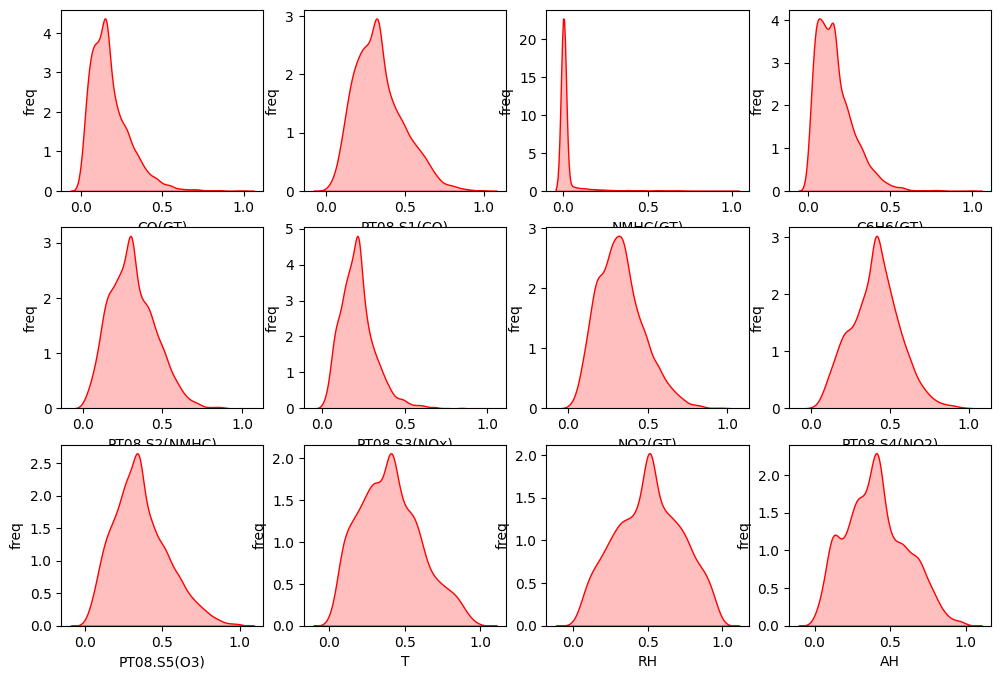

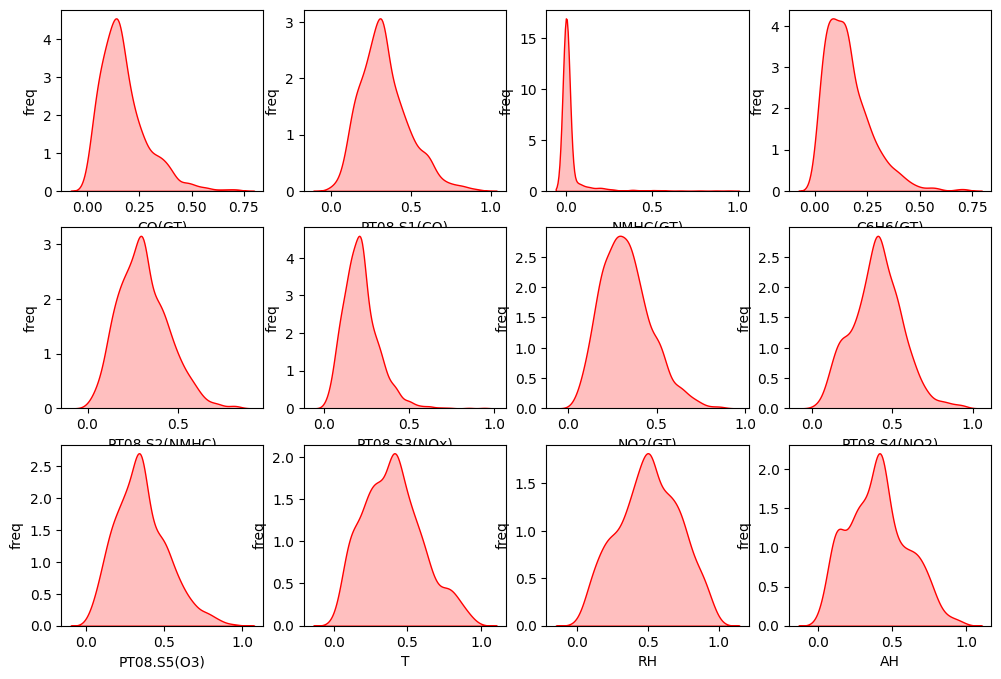

In [31]:
def plot_kde(data):
    rows = 3
    cols = 4
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns.tolist()):
        if col != "target":
            ax = plt.subplot(rows, cols, i + 1)
            ax = sns.kdeplot(data[col], color='r', fill=True)
            ax.set_xlabel(col)
            ax.set_ylabel("freq")
    plt.show()
    
plot_kde(X_preNOx)
plot_kde(X_preNOx_valid)

#### if we have the test dataset, we can find features by kde  with inconsistent distribution and then delete.

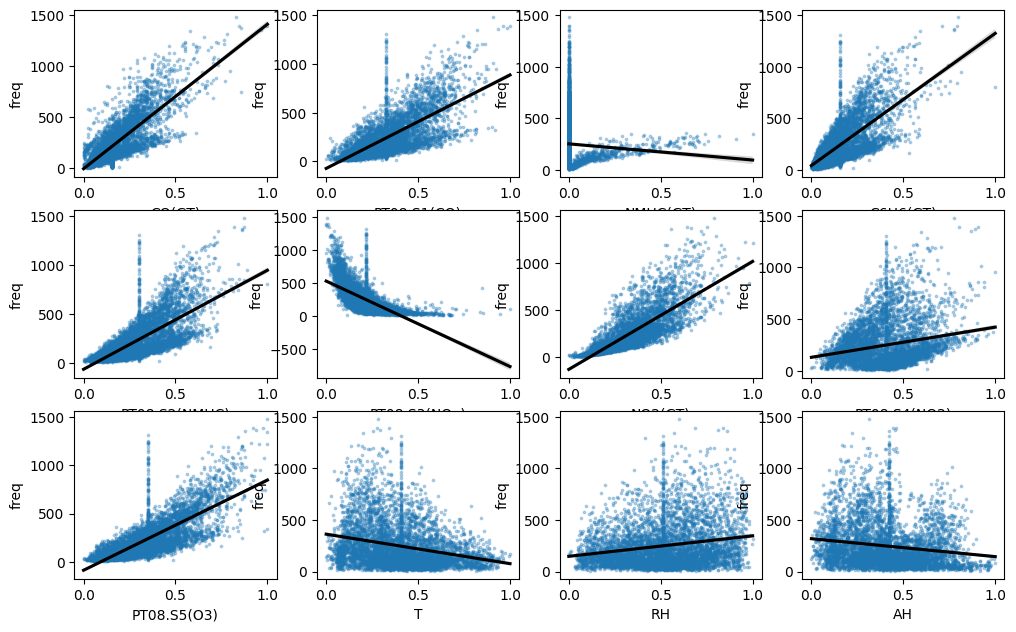

In [32]:
def plot_reg(data, target):
    rows = 4
    cols = 4
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(data.columns.tolist()):
        ax = plt.subplot(rows, cols, i + 1)
        ax = sns.regplot(x=data[col], y=target, ax=ax, scatter_kws={'marker':'.', 's':3, 'alpha':0.3}, line_kws={'color':'k'})
        ax.set_xlabel(col)
        ax.set_ylabel("freq")
    plt.show()

plot_reg(X_preNOx, y_preNOX)

#### obviously, the NOX content has linear relationship with many features

###### Regplot can be used to view the relationship between continuous and covariance matrices in regression tasks; 
###### Viewing the Relationship between Regression Problems Using a Violin Chart

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## the classification task

#### i try to use polynomialfeatures to create new features and find the more relationships than linear between features and labels

In [34]:
poly_class = PolynomialFeatures(degree=2)
X = poly_class.fit_transform(X_preCO)
with open("poly_class.pkl", "wb") as f:
    pickle.dump(poly_class, f)
X_valid = poly_class.transform(X_preCO_valid)
y = y_preCO.reset_index(drop=True)
y_valid = y_preCO_valid.reset_index(drop=True)

In [35]:
model_classification = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(poly_X.shape[1],), kernel_regularizer=l2(0.01)))
model_classification.add(Dense(128, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)))
model_classification.add(Dropout(0.2))
model_classification.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model_classification.add(Dropout(0.2))
model_classification.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model_classification.add(Dropout(0.2))
model_classification.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
model_classification.add(Dropout(0.2))
# model.add(Dense(8, activation="relu", kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))
model_classification.add(Dense(1, activation='sigmoid'))
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)
model_classification.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
history = model_classification.fit(X, y, epochs=500, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/500
43/43 [==============================] - 1s 6ms/step - loss: 2.8173 - accuracy: 0.7756 - val_loss: 1.9469 - val_accuracy: 0.9100
Epoch 2/500
43/43 [==============================] - 0s 3ms/step - loss: 1.5149 - accuracy: 0.8852 - val_loss: 1.1171 - val_accuracy: 0.9070
Epoch 3/500
43/43 [==============================] - 0s 3ms/step - loss: 0.9373 - accuracy: 0.9085 - val_loss: 0.7323 - val_accuracy: 0.9173
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.8996 - val_loss: 0.5405 - val_accuracy: 0.9188
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.9079 - val_loss: 0.4512 - val_accuracy: 0.9188
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.9103 - val_loss: 0.3885 - val_accuracy: 0.9255
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.9077 - val_loss: 0.3586 - val_accuracy: 0.9240
Epoch 8/500
4

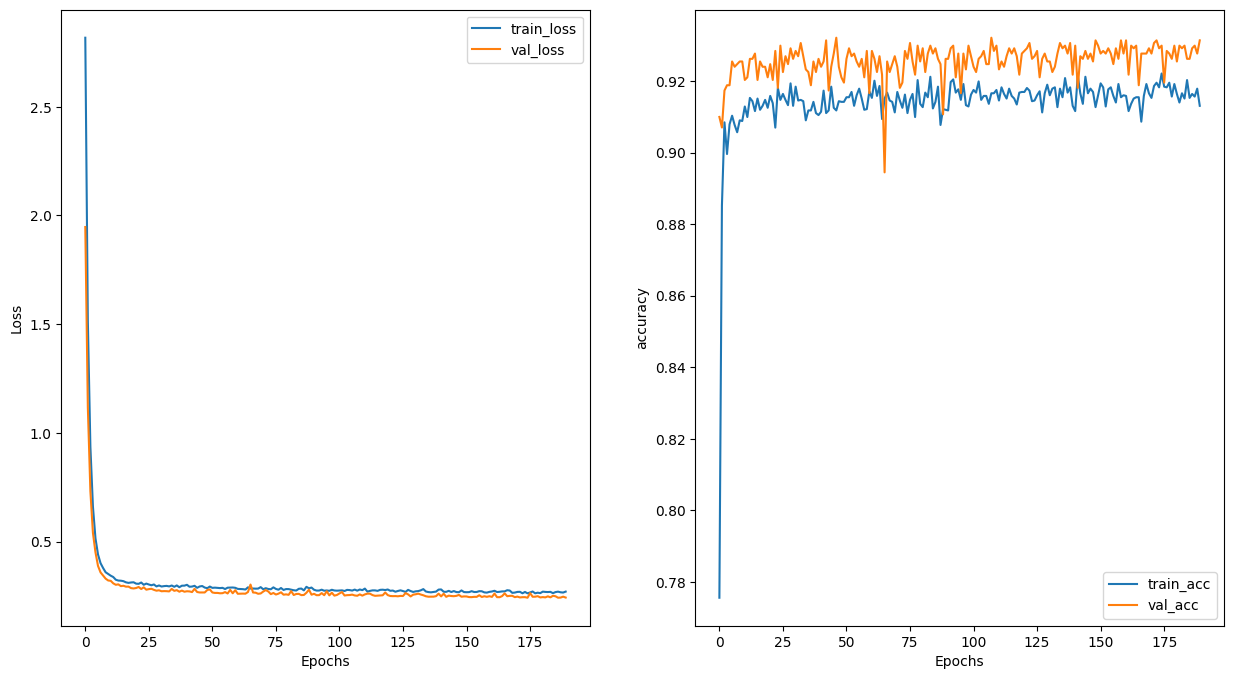

In [36]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
predict = (model_classification.predict(X_valid) > 0.5).astype('int')
accuracy_score(y_valid.values, predict)

43/43 [==============================] - 0s 613us/step


0.9298892988929889

In [38]:
from sklearn.metrics import confusion_matrix

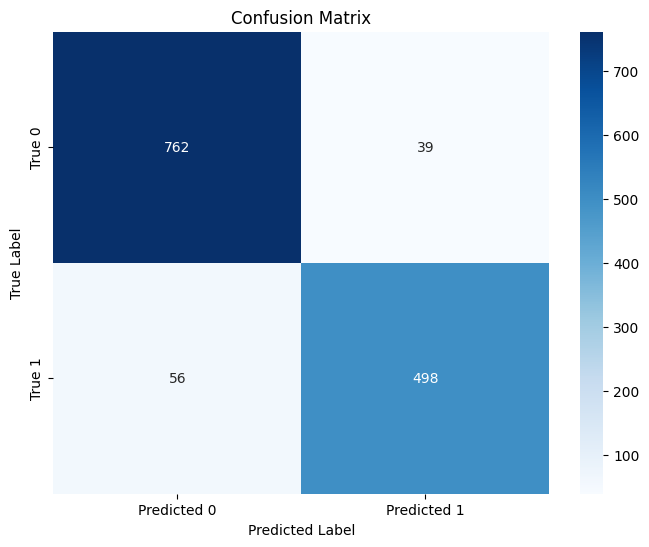

In [39]:
cm = confusion_matrix(y_valid, predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(predict, y_valid)
precision = precision_score(predict, y_valid)
print("                       | Accuracy  | Precision | Number_of_samples")
print(f'CO(GT) classification  |  {accuracy:.4f}   |  {precision:.4f}   |    {len(y_preCO_valid)}')


                       | Accuracy  | Precision | Number_of_samples
CO(GT) classification  |  0.9299   |  0.8989   |    1355


In [37]:
# for row in cm:
#     print(" ".join(str(x) for x in row))

In [38]:
model_classification.save("classification_model.h5")

c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Regression Task

In [41]:
poly_reg = PolynomialFeatures(degree=2)
X = poly_reg.fit_transform(X_preNOx)
with open("poly_reg.pkl", "wb") as f:
    pickle.dump(poly_reg, f)
X_valid = poly_reg.transform(X_preNOx_valid)
y = y_preNOX.reset_index(drop=True)
y_valid = y_preNOx_valid.reset_index(drop=True)

In [42]:
model_regression = Sequential()

model_regression.add(Dense(256, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)))
# model_regression.add(Dropout(0.2))
model_regression.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
# model_regression.add(Dropout(0.2))
model_regression.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model_regression.add(Dropout(0.2))
model_regression.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
# model_regression.add(Dropout(0.2))
model_regression.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
# model_regression.add(Dropout(0.2))
model_regression.add(Dense(1))
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)
model_regression.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model_regression.fit(X, y, epochs=500, batch_size=64, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/500
85/85 [==============================] - 1s 2ms/step - loss: 56991.3398 - mean_absolute_error: 170.5129 - val_loss: 18646.0820 - val_mean_absolute_error: 104.8966
Epoch 2/500
85/85 [==============================] - 0s 1ms/step - loss: 11539.8936 - mean_absolute_error: 73.6930 - val_loss: 7994.8740 - val_mean_absolute_error: 57.6338
Epoch 3/500
85/85 [==============================] - 0s 1ms/step - loss: 7251.0884 - mean_absolute_error: 55.3107 - val_loss: 7048.5181 - val_mean_absolute_error: 53.2802
Epoch 4/500
85/85 [==============================] - 0s 1ms/step - loss: 6319.8320 - mean_absolute_error: 51.3663 - val_loss: 6249.5483 - val_mean_absolute_error: 49.3141
Epoch 5/500
85/85 [==============================] - 0s 1ms/step - loss: 5794.2070 - mean_absolute_error: 49.1038 - val_loss: 6379.5049 - val_mean_absolute_error: 50.0541
Epoch 6/500
85/85 [==============================] - 0s 1ms/step - loss: 5327.1157 - mean_absolute_error: 47.0848 - val_loss: 5643.3447 - va

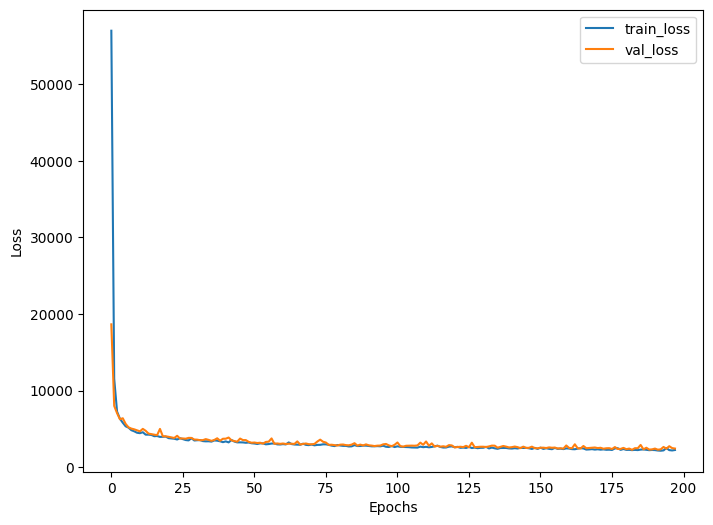

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


43/43 [==============================] - 0s 812us/step


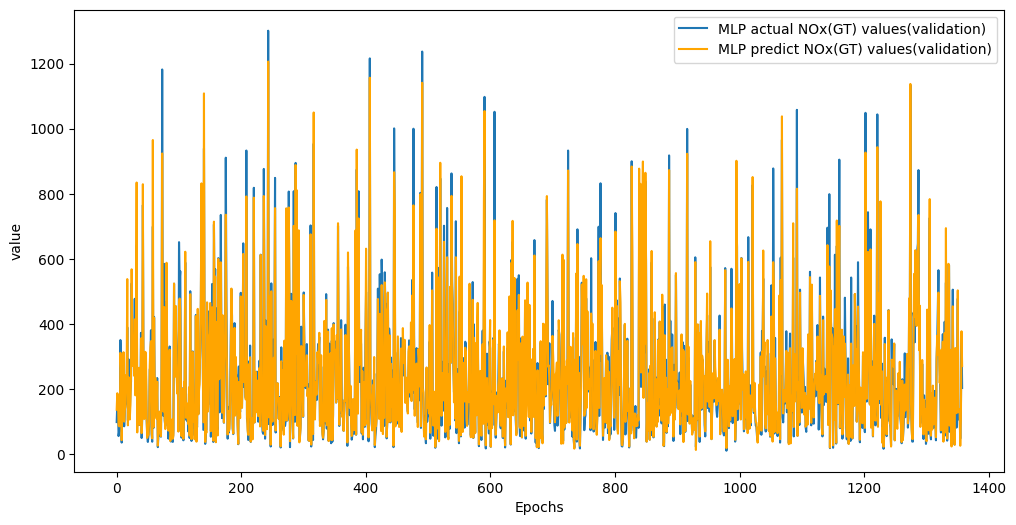

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(y_valid), len(y_valid)), y_valid.values, label="MLP actual NOx(GT) values(validation)")
plt.plot(np.linspace(0, len(y_valid), len(y_valid)), model_regression.predict(X_valid), color="orange", label="MLP predict NOx(GT) values(validation)")
plt.xlabel('Epochs')
plt.ylabel('value')
plt.legend()
plt.show()

In [45]:
RMSE = np.sqrt(mean_squared_error(y_valid, model_regression.predict(X_valid)))
MAE = mean_absolute_error(y_valid, model_regression.predict(X_valid))
print("  RMSE  |   MAE    | Number_of_samples")
print(f"{RMSE:.4f} | {MAE:.4f}  |    {len(y_valid)}")

43/43 [==============================] - 0s 903us/step
  RMSE  |   MAE    | Number_of_samples
47.3883 | 29.2326  |    1357


In [44]:
model_regression.save("regression_model.h5")

c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## processing of the test dataset

In [51]:
from tensorflow.python.ops.numpy_ops import np_config
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score


model_class = load_model("classification_model.h5")
model_regress = load_model("regression_model.h5")
np_config.enable_numpy_behavior()
test = pd.read_excel("Generalization Dataset.xlsx")
features_CO = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
        'AH']
features_NOx = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
        'AH']
X_preCO_test = test[features_CO]
X_preNOx_test = test[features_NOx]
with open("preCO_fill_values.pkl", "rb") as f1, open("preNOx_fill_values.pkl", "rb") as f2:
    preCO_fill_vlaues = pickle.load(f1)
    preNOx_fill_values = pickle.load(f2)
    features_CO = preCO_fill_vlaues.keys()
    features_NOx = preNOx_fill_values.keys()
def fill_missing_values(df, fill_value:dict):
    for col in df.columns:
        df.loc[df[col] < 0, col] = fill_value[col]
fill_missing_values(X_preCO_test, preCO_fill_vlaues)
fill_missing_values(X_preNOx_test, preNOx_fill_values)
with open("minmaxscaler_classification.pkl", "rb") as f1, open("minmaxscaler_regression.pkl", "rb") as f2:
    minmaxscaler_classification = pickle.load(f1)
    minmaxscaler_regression = pickle.load(f2)
X_preCO_test = minmaxscaler_classification.transform(X_preCO_test)
X_preNOx_test = minmaxscaler_regression.transform(X_preNOx_test)
with open("poly_reg.pkl", "rb") as f1, open("poly_class.pkl", "rb") as f2:
    poly_reg = pickle.load(f1)
    poly_class = pickle.load(f2)
X_preCO_test = poly_class.transform(X_preCO_test)
X_preNOx_test = poly_reg.transform(X_preNOx_test)
y_preCO_test = (model_class(X_preCO_test) > 0.5).astype(tf.int32)
y_preNOx_test = model_regress(X_preNOx_test)
y_CO = np.where(test["CO(GT)"] > threshold, 1, 0)
y_NOx = test["NOx(GT)"]
RMSE = np.sqrt(mean_squared_error(y_NOx, y_preNOx_test))
MAE = mean_absolute_error(y_NOx, y_preNOx_test)
print("  RMSE  |   MAE    | Number_of_samples")
print(f"{RMSE:.4f} | {MAE:.4f}  |    {len(y_NOx)}")
accuracy = accuracy_score(y_CO, y_preCO_test)
precision = precision_score(y_CO, y_preCO_test)
print("------------------------------------------------------")
print("                       | Accuracy  | Precision | Number_of_samples")
print(f'CO(GT) classification  |  {accuracy:.4f}   |  {precision:.4f}   |    {len(y_preCO_test)}')

  RMSE  |   MAE    | Number_of_samples
53.1978 | 33.4067  |    872
------------------------------------------------------
                       | Accuracy  | Precision | Number_of_samples
CO(GT) classification  |  0.9392   |  0.9408   |    872


C:\Users\learn\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\learn\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
